# TP MM03
### Data Science Exercises
This notebook contains solutions for exercises described in the TP document, including data manipulation, visualization, and cleaning using Pandas and other libraries.

## Exercise 1: Loan Requests and Credits
### Objective
Analyze loan data to calculate financial metrics and visualize insights.

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('data_mm03_loans.csv')
data.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


### Q2: Data Enrichment

In [3]:
# Q2.1: Calculate 'taux_endettement'
data['taux_endettement'] = round((data['remboursement'] / data['revenu']) * 100, 2)

# Q2.2: Rename 'taux' to 'taux_interet'
data.rename(columns={'taux': 'taux_interet'}, inplace=True)

# Q2.3: Calculate 'cout_total'
data['cout_total'] = data['remboursement'] * data['duree']

# Q2.4: Calculate 'benefices'
data['benefices'] = (data['cout_total'] * data['taux_interet']) / (100 * 24)

data.head()


,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.989840
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.686400
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.966006
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.706888
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.567581


### Q3: Preliminary Visualizations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


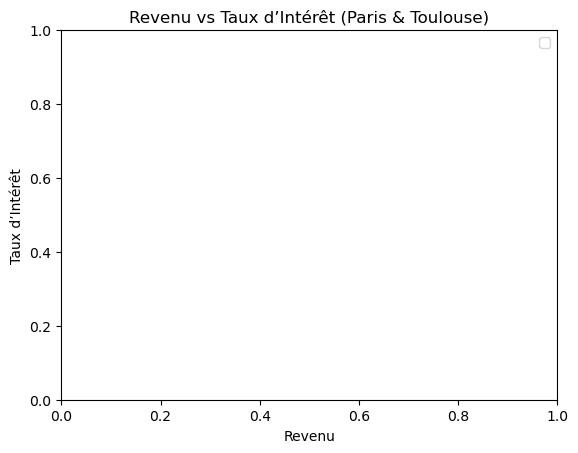

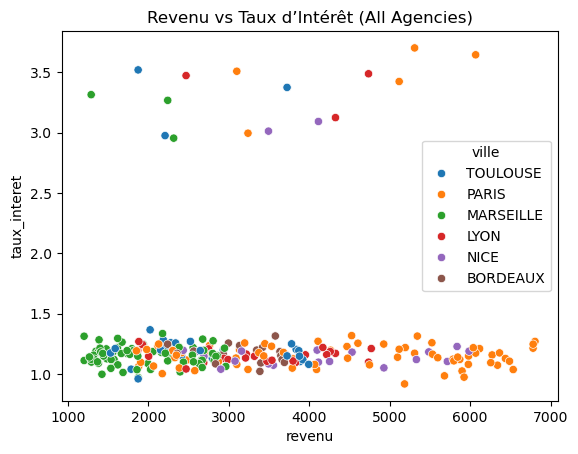

In [4]:
# Q3.1: Scatter plot for Paris and Toulouse
import matplotlib.pyplot as plt
paris_toulouse = data[data['ville'].isin(['Paris', 'Toulouse'])]
for city in paris_toulouse['ville'].unique():
    subset = paris_toulouse[paris_toulouse['ville'] == city]
    plt.scatter(subset['revenu'], subset['taux_interet'], label=city)

plt.legend()
plt.title('Revenu vs Taux d’Intérêt (Paris & Toulouse)')
plt.xlabel('Revenu')
plt.ylabel('Taux d’Intérêt')
plt.show()

import seaborn as sns
# Q3.2: General scatter plot with Seaborn
sns.scatterplot(data=data, x='revenu', y='taux_interet', hue='ville')
plt.title('Revenu vs Taux d’Intérêt (All Agencies)')
plt.show()


### Q4: Filtering and Manipulations

In [5]:
# Q4.1: Loans of type 'automobile'
auto_loans = data[data['type'] == 'automobile']

# Q4.2: IDs of clients with 'automobile' loans
auto_loan_ids = auto_loans['identifiant']

# Q4.3: IDs and income of clients with 'automobile' loans
auto_loan_info = auto_loans[['identifiant', 'revenu']]
auto_loan_info.head()


,identifiant,revenu
1,1,5310.0
65,63,4114.0
67,64,4326.0
87,83,2207.0
100,95,6069.0


### Q5: Aggregations

Number of automobile loans: 16, Average total cost: 13665.0


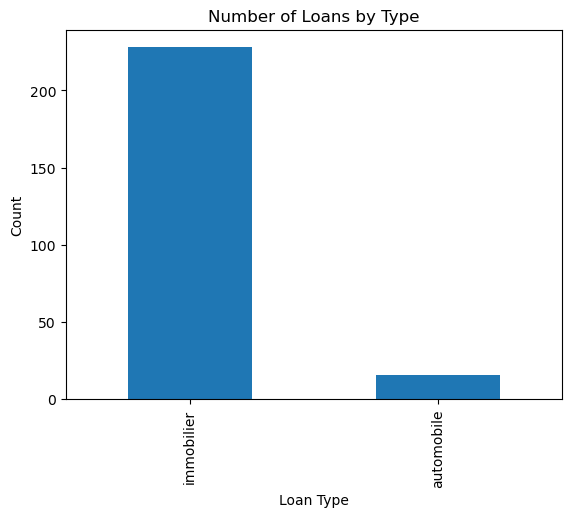

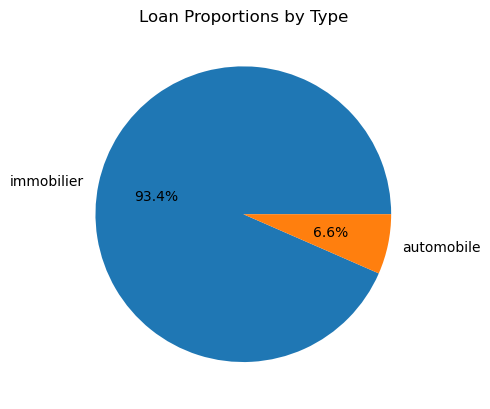

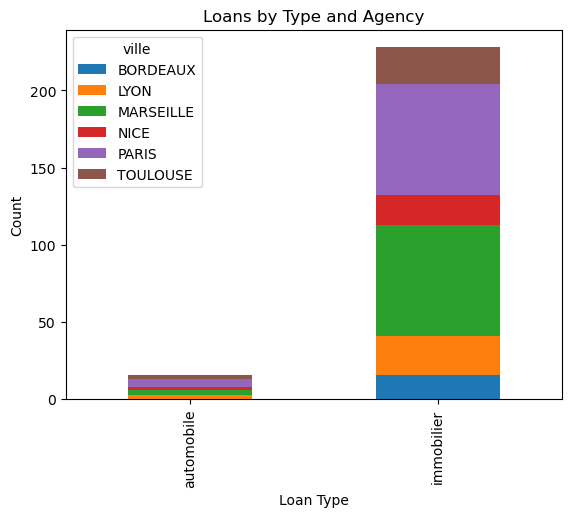

Total high-risk clients: 58
High-risk clients in Paris: 0
Number of high-risk clients based on recalculated profiles: 62
Total monthly benefits for Toulouse: 0.0
                        benefices
ville     type                   
BORDEAUX  immobilier  1681.321165
LYON      automobile    47.380436
          immobilier  2967.401106
MARSEILLE automobile    61.355880
          immobilier  4334.555792
NICE      automobile    31.145440
          immobilier  2651.590936
PARIS     automobile    99.495111
          immobilier  9916.835494
TOULOUSE  automobile    61.219767
          immobilier  2076.836061
type       automobile  immobilier
ville                            
BORDEAUX          NaN  105.082573
LYON        15.793479  118.696044
MARSEILLE   20.451960   60.202164
NICE        15.572720  139.557418
PARIS       19.899022  137.733826
TOULOUSE    20.406589   86.534836


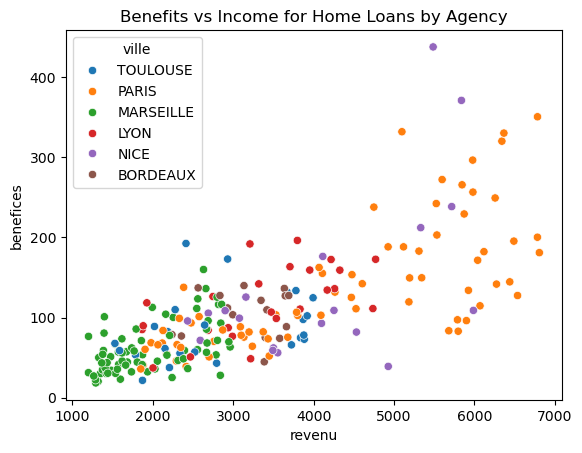

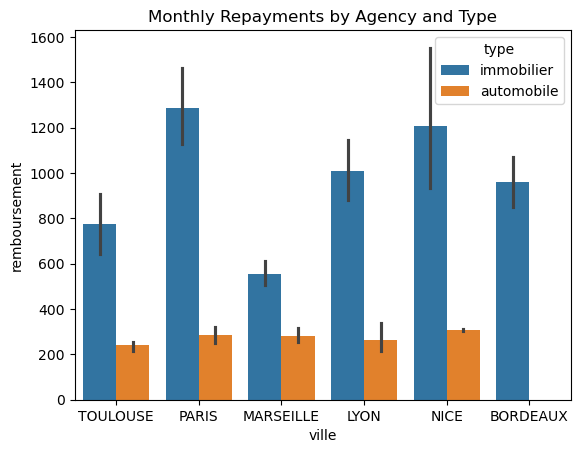

In [6]:
# Q5.1: Count and average total cost of 'automobile' loans
auto_loan_count = auto_loans.shape[0]
auto_loan_avg_cost = auto_loans['cout_total'].mean()
print(f"Number of automobile loans: {auto_loan_count}, Average total cost: {auto_loan_avg_cost}")

# Q5.2: Bar chart and pie chart for loan types
loan_type_counts = data['type'].value_counts()

# Bar chart
loan_type_counts.plot(kind='bar', title='Number of Loans by Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

# Pie chart
loan_type_counts.plot(kind='pie', autopct='%1.1f%%', title='Loan Proportions by Type')
plt.ylabel('')
plt.show()

# Q5.3: Loans by type and agency
loans_by_type_and_agency = data.groupby(['type', 'ville']).size().unstack()
loans_by_type_and_agency.plot(kind='bar', stacked=True, title='Loans by Type and Agency')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

# Q5.4: Clients exceeding the debt-to-income ratio threshold
high_risk_clients = data[data['taux_endettement'] > 35]
high_risk_clients_paris = high_risk_clients[high_risk_clients['ville'] == 'Paris']
print(f"Total high-risk clients: {high_risk_clients.shape[0]}")
print(f"High-risk clients in Paris: {high_risk_clients_paris.shape[0]}")

# Q5.5: Add 'risque' column
data['risque'] = data['taux_endettement'] > 35
data.head()

# Q5.6: Profile clients by summarizing their information
profil_clients = data.groupby('identifiant').agg({
    'remboursement': 'sum',
    'taux_endettement': 'sum',
    'cout_total': 'sum',
    'benefices': 'sum'
}).reset_index()
profil_clients.head()

# Q5.7: Recalculate exact number of high-risk clients
risk_profiles = profil_clients[profil_clients['taux_endettement'] > 35]
print(f"Number of high-risk clients based on recalculated profiles: {risk_profiles.shape[0]}")

# Q5.8: Total monthly benefits for Toulouse
toulouse_benefits = data[data['ville'] == 'Toulouse']['benefices'].sum()
print(f"Total monthly benefits for Toulouse: {toulouse_benefits}")

# Q5.9: Benefits by agency and loan type
benefits_by_agency_type = data.groupby(['ville', 'type']).agg({'benefices': 'sum'})
print(benefits_by_agency_type)

# Q5.10: Pivot table for average benefits
benefits_pivot = data.pivot_table(
    values='benefices', index='ville', columns='type', aggfunc='mean'
)
print(benefits_pivot)

# Q5.11: Scatterplot for benefits vs. income for home loans
home_loans = data[data['type'] == 'immobilier']
sns.scatterplot(data=home_loans, x='revenu', y='benefices', hue='ville')
plt.title('Benefits vs Income for Home Loans by Agency')
plt.show()

# Q5.12: Barplot for monthly repayments by agency and type
sns.barplot(data=data, x='ville', y='remboursement', hue='type')
plt.title('Monthly Repayments by Agency and Type')
plt.show()


## Exercise 2: Olympic Games Analysis
### Objective
Analyze historical Olympic data to derive insights and visualizations.

### Q1: Data Import and Null Values

In [7]:
# Q4.1: Loans of type 'automobile'
auto_loans = data[data['type'] == 'automobile']

# Q4.2: IDs of clients with 'automobile' loans
auto_loan_ids = auto_loans['identifiant']

# Q4.3: IDs and income of clients with 'automobile' loans
auto_loan_info = auto_loans[['identifiant', 'revenu']]
auto_loan_info.head()


,identifiant,revenu
1,1,5310.0
65,63,4114.0
67,64,4326.0
87,83,2207.0
100,95,6069.0


### Q2: Data Exploration and Filtering

In [8]:
# Q2.1: Count unique sports and the least represented ones
unique_sports = olympic_data['Sport'].value_counts()
least_represented = unique_sports.tail(20)
least_represented

NameError: name 'olympic_data' is not defined

In [ ]:
# Q2.2: Countries with <10 appearances and the most represented
country_counts = olympic_data['Team'].value_counts()
rare_countries = country_counts[country_counts < 10]
most_represented = country_counts.head(3)
rare_countries, most_represented

(Team
 Mascotte                           9
 Pannonia RC/National RC            9
 Berliner Ruderverein von 1876-2    9
 Gteborgs Roddklubb-1               9
 Sydney Rowing Club                 9
                                   ..
 Demi-Mondaine-15                   1
 Demi-Mondaine-17                   1
 Notavel                            1
 Galopin De La Font                 1
 Pop Art                            1
 Name: count, Length: 818, dtype: int64,
 Team
 United States    17847
 France           11988
 Great Britain    11404
 Name: count, dtype: int64)

### Q3: Advanced Queries

In [ ]:
# Q3.1: Oldest athlete and oldest medalist
oldest_athlete = olympic_data.loc[olympic_data['Age'].idxmax()]
medalist_data = olympic_data[olympic_data['Medal'].notnull()]
oldest_medalist = medalist_data.loc[medalist_data['Age'].idxmax()]
oldest_athlete, oldest_medalist


(ID                                             128719
 Name                           John Quincy Adams Ward
 Sex                                                 M
 Age                                              97.0
 Height                                            NaN
 Weight                                            NaN
 Team                                    United States
 NOC                                               USA
 Games                                     1928 Summer
 Year                                             1928
 Season                                         Summer
 City                                        Amsterdam
 Sport                                Art Competitions
 Event     Art Competitions Mixed Sculpturing, Statues
 Medal                                             NaN
 Name: 257054, dtype: object,
 ID                                                22984
 Name      John (Herbert Crawford-) Copley (Williamson-)
 Sex                           

### Q4: Evolution of Medals Over Time

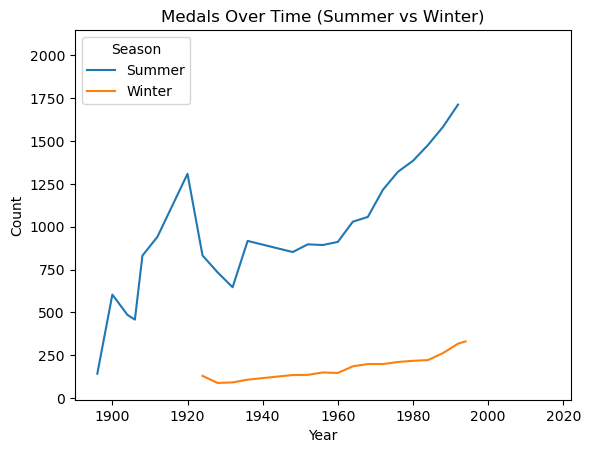

In [ ]:
medal_counts = olympic_data.groupby(['Year', 'Season'])['Medal'].count().unstack()
medal_counts.plot(kind='line', title='Medals Over Time (Summer vs Winter)', xlabel='Year', ylabel='Count')
plt.show()


### Q5: Distribution Analysis

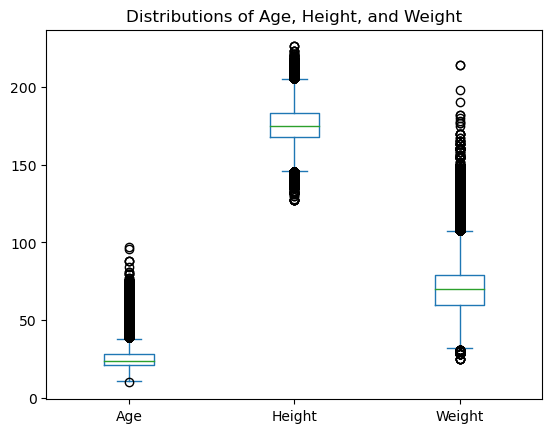

In [ ]:
# Q5.1: Boxplots for age, height, and weight
olympic_data[['Age', 'Height', 'Weight']].plot.box(title='Distributions of Age, Height, and Weight')
plt.show()